In [7]:
import caiman as cm
from caiman.source_extraction.cnmf.pre_processing import preprocess_data
from caiman.source_extraction.cnmf.pre_processing import mean_psd
from caiman.source_extraction.cnmf.pre_processing import find_unsaturated_pixels

In [4]:
preprocess_data?

Signature:
preprocess_data(
    Y,
    sn=None,
    dview=None,
    n_pixels_per_process=100,
    noise_range=[0.25, 0.5],
    noise_method='logmexp',
    compute_g=False,
    p=2,
    lags=5,
    include_noise=False,
    pixels=None,
    max_num_samples_fft=3000,
    check_nan=True,
)
Docstring:
Performs the pre-processing operations described above.

Args:
    Y: ndarray
        input movie (n_pixels x Time). Can be also memory mapped file.

    n_processes: [optional] int
        number of processes/threads to use concurrently

    n_pixels_per_process: [optional] int
        number of pixels to be simultaneously processed by each process

    p: positive integer
        order of AR process, default: 2

    lags: positive integer
        number of lags in the past to consider for determining time constants. Default 5

    include_noise: Boolean
        Flag to include pre-estimated noise value when determining time constants. Default: False

    noise_range: np.ndarray [2 x 1] betwe

In [8]:
movie = cm.load("../data/Sue_2x_3000_40_-46.tif")
movie.play()

In [10]:
# pre-process data
Y, g, psx, sn_s = preprocess_data(movie)
Y.shape

(3000, 170, 170)

movie([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

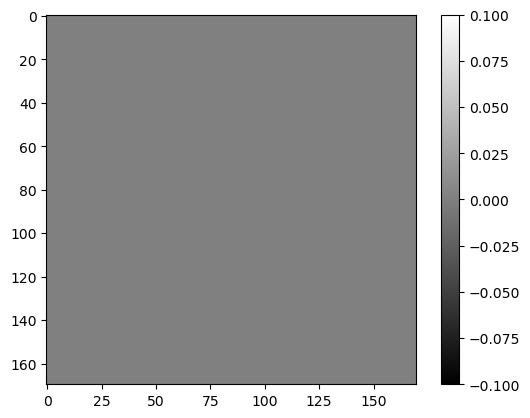

In [14]:
import matplotlib.pyplot as plt
plt.imshow(Y[0]-movie[0], cmap='gray')
plt.colorbar()

In [23]:
movie.shape

(3000, 170, 170)

In [24]:
import numpy as np

# Create a random numpy array with shape (3000, 170, 170) as an example
array_shape = (3000, 170, 170)
your_array = movie.copy()

# Define parameters for the Gaussian noise
mean = 0  # Mean of the Gaussian distribution
stddev = 0.1  # Standard deviation of the Gaussian distribution

# Generate Gaussian noise with the same shape as your array
noise = np.random.normal(mean, stddev, your_array.shape)

# Add the noise to your array
noisy_array = your_array + noise

# Make sure the pixel values are within the valid range [0, 1]
noisy_array = np.clip(noisy_array, 0, 1)

# Now, 'noisy_array' contains your original data with Gaussian noise added to each image


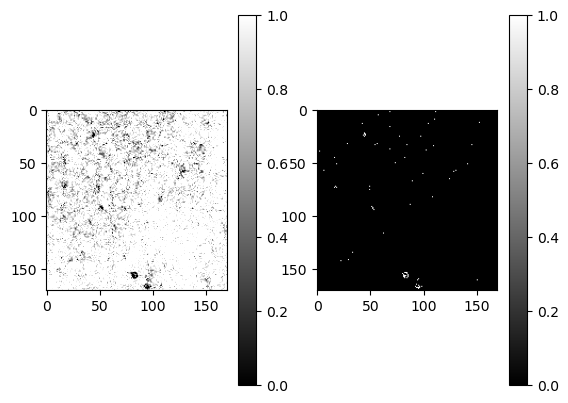

In [27]:
plt.subplot(121)
plt.imshow(movie[0]/np.mean(movie[0]), cmap='gray', vmin=0.0, vmax=1.0)
plt.colorbar()

plt.subplot(122)
plt.imshow(noisy_array[0], cmap='gray', vmin=0.0, vmax=1.0)
plt.colorbar()

In [29]:
# pre-process noisy array
Y, g, psx, sn_s = preprocess_data(noisy_array)
Y.shape

(3000, 170, 170)

In [32]:
sn_s
# NO CLUE WHAT'S HAPPENING HERE!

In [35]:
# mean psd
mean_psd?

Signature: mean_psd(y, method='logmexp')
Docstring:
Averaging the PSD

Args:
    y: np.ndarray
         PSD values

    method: string
        method of averaging the noise.
        Choices:
         'mean': Mean
         'median': Median
         'logmexp': Exponential of the mean of the logarithm of PSD (default)

Returns:
    mp: array
        mean psd
File:      c:\users\sangeetha\anaconda3\envs\caiman\lib\site-packages\caiman\source_extraction\cnmf\pre_processing.py
Type:      function

In [36]:
find_unsaturated_pixels?

Signature:
find_unsaturated_pixels(
    Y,
    saturationValue=None,
    saturationThreshold=0.9,
    saturationTime=0.005,
)
Docstring:
Identifies the saturated pixels that are saturated and returns the ones that are not.
A pixel is defined as saturated if its observed fluorescence is above
saturationThreshold*saturationValue at least saturationTime fraction of the time.

Args:
    Y: np.ndarray
        input movie data, either 2D or 3D with time in the last axis

    saturationValue: scalar (optional)
        Saturation level, default value the lowest power of 2 larger than max(Y)

    saturationThreshold: scalar between 0 and 1 (optional)
        Fraction of saturationValue above which the fluorescence is considered to
        be in the saturated region. Default value 0.9

    saturationTime: scalar between 0 and 1 (optional)
        Fraction of time that pixel needs to be in the saturated
        region to be considered saturated. Default: 0.005

Returns:
    normalPixels:   nd.arr

In [42]:
unsaturated_pix = find_unsaturated_pixels(movie, saturationThreshold=0.01)
unsaturated_pix[0].shape

(74327,)